In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [12]:
#read in the data
df = pd.read_csv('radars.csv')

In [13]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [14]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [15]:
df.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Donny van de Beek

In [16]:
df = df[(df['Player']=='Tammy Abraham') | (df['Player']=='Timo Werner')].reset_index()

In [17]:
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
1,481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


In [18]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)

In [19]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,5.6,5.6,0.18,0.4,0.4
1,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,8.4,8.4,0.15,-3.4,-3.4


In [21]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [26]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Tammy Abraham':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Timo Werner':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [27]:
values

[[6, 31, 13, 41.9, 2.73, 1.15, 0.19, 0.46, 9.9, 5.6, 5.6, 0.18, 0.4, 0.4],
 [5, 55, 21, 38.2, 2.69, 1.03, 0.09, 0.24, 13.7, 8.4, 8.4, 0.15, -3.4, -3.4]]

In [28]:
#title 

title = dict(
    title_name='Tammy Abraham',
    title_color = 'red',
    subtitle_name = 'Chelsea',
    subtitle_color = 'red',
    title_name_2='Timo Werner',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@mckayjohns\ndata via FBREF / Statsbomb'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


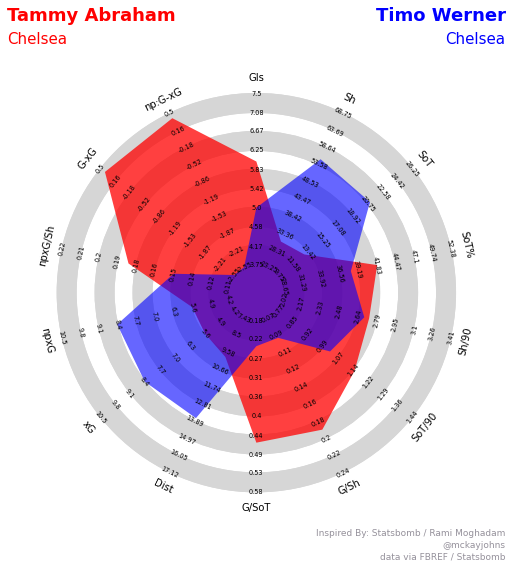

In [29]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)